In [1]:
import os
# move to parent directory
os.chdir('..')

In [2]:
import shlex
import sys

argv = shlex.split("""
    --architecture=add_rule_embedding \
    --from_pretrained=False \
    --hidden_size=768 \
    --intermediate_size=1536 \
    --num_attention_heads=12 \
    --num_layers=12 \
    --max_position_embeddings=1024 \
    \
    \
    --num_train=20000000 \
    --num_eval=100 \
    --n_digits_train='1,33 1,33 1,17' \
    --op_train='add add add' \
    --format_train='reverse-no-carry reverse-carry-only reverse' \
    --op_dist_train='1 1 1' \
    --n_digits_eval='4,49,4' \
    --op_eval='add add add' \
    --format_eval='reverse-no-carry reverse-carry-only reverse' \
    --op_dist_eval='1 1 1' \
    --show_task_ids=True \
    \
    \
    --resume_from_checkpoint='out/add_rule_embedding-768-12-12-1024-reverse-no-carry_reverse-carry-only_reverse-digits-1_33_1_33_1_17/checkpoint-10000' \
    --run_name='test' \
    --output_dir=out \
    --do_train=False \
    --do_eval=True \
    --max_steps=15000 \
    --learning_rate=5e-4 \
    --lr_scheduler_type='warmup_stable_decay' \
    --lr_scheduler_kwargs='{"num_stable_steps": 12000, "num_decay_steps": 1500}' \
    --adam_beta2=0.98 \
    --adam_epsilon=1e-12 \
    --weight_decay=0.01 \
    --warmup_ratio=0.1 \
    --logging_steps=20 \
    --eval_strategy="steps" \
    --eval_steps=200 \
    --predict_with_generate \
    --remove_unused_columns=False \
    --eval_on_start=True \
    --per_device_train_batch_size=320 \
    --per_device_eval_batch_size=1024 \
    --gradient_accumulation_steps=6 \
    --include_inputs_for_metrics=True \
    --save_steps=500 \
    --torch_compile=True \
    --bf16=True \
    --tf32=True
""")

sys.argv = sys.argv[:1] + argv
print(sys.argv)


['/opt/conda/lib/python3.11/site-packages/ipykernel_launcher.py', '--architecture=add_rule_embedding', '--from_pretrained=False', '--hidden_size=768', '--intermediate_size=1536', '--num_attention_heads=12', '--num_layers=12', '--max_position_embeddings=1024', '--num_train=20000000', '--num_eval=100', '--n_digits_train=1,33 1,33 1,17', '--op_train=add add add', '--format_train=reverse-no-carry reverse-carry-only reverse', '--op_dist_train=1 1 1', '--n_digits_eval=4,49,4', '--op_eval=add add add', '--format_eval=reverse-no-carry reverse-carry-only reverse', '--op_dist_eval=1 1 1', '--show_task_ids=True', '--resume_from_checkpoint=out/add_rule_embedding-768-12-12-1024-reverse-no-carry_reverse-carry-only_reverse-digits-1_33_1_33_1_17/checkpoint-10000', '--run_name=test', '--output_dir=out', '--do_train=False', '--do_eval=True', '--max_steps=15000', '--learning_rate=5e-4', '--lr_scheduler_type=warmup_stable_decay', '--lr_scheduler_kwargs={"num_stable_steps": 12000, "num_decay_steps": 1500}'

In [5]:
import torch

from lib.configs import ScriptArguments, ModelArguments, DataArguments
from lib.data_utils import get_eval_dataset

from preamble import get_args, get_tokenizer, get_all_datasets, get_model, prepare_train_args, get_trainer

args, model_args, data_args, train_args = get_args()

tokenizer = get_tokenizer(model_args, data_args)

train_dataset, eval_datasets = get_all_datasets(train_args, data_args, tokenizer)

model = get_model(train_args, model_args, tokenizer)
print(model)

train_args = prepare_train_args(train_args, model_args, data_args, tokenizer)

trainer = get_trainer(args, data_args, model_args, model, tokenizer, train_args, train_dataset, eval_datasets)

trainer._load_from_checkpoint(train_args.resume_from_checkpoint)


----------- Examples from eval: -------------
[3, 32, 60, 61, 61, 63, 78, 67, 59, 66, 60, 86]
[BOS]A2335+9182=
[59, 62, 59, 65, 58, 1]
14170[EOS]
[3, 32, 61, 61, 59, 59, 78, 66, 58, 67, 67, 86]
[BOS]A3311+8099=
[59, 61, 58, 58, 58, 1]
13000[EOS]
[3, 33, 58, 63, 58, 59, 78, 64, 63, 63, 63, 86]
[BOS]B0501+6555=
[58, 58, 59, 58, 58, 1]
00100[EOS]
[3, 33, 60, 67, 64, 67, 78, 67, 59, 60, 61, 86]
[BOS]B2969+9123=
[58, 59, 59, 58, 59, 1]
01101[EOS]
[3, 34, 67, 64, 60, 64, 78, 66, 63, 67, 63, 86]
[BOS]C9626+8595=
[65, 60, 60, 60, 59, 1]
72221[EOS]
[3, 34, 63, 63, 58, 66, 78, 62, 67, 64, 60, 86]
[BOS]C5508+4962=
[67, 62, 65, 58, 59, 1]
94701[EOS]
[3, 32, 66, 59, 60, 60, 64, 60, 62, 64, 78, 64, 60, 61, 63, 65, 60, 67, 59, 86]
[BOS]A81226246+62357291=
[62, 61, 63, 65, 61, 62, 61, 65, 58, 1]
435734370[EOS]
[3, 32, 64, 63, 64, 67, 59, 60, 59, 60, 78, 67, 66, 61, 59, 62, 61, 60, 64, 86]
[BOS]A65691212+98314326=
[63, 61, 67, 58, 63, 63, 61, 66, 58, 1]
539055380[EOS]
[3, 33, 67, 64, 65, 61, 67, 61, 62

max_steps is given, it will override any value given in num_train_epochs


Number of parameters: 70954752
Number of trainable parameters: 70954752
LlamaModelWithAddRules(
  (model): LlamaModelWithNoPE(
    (embed_tokens): AddRuleEmbedding(
      (embedding): Embedding(102, 768)
    )
    (layers): ModuleList(
      (0-11): 12 x LlamaDecoderLayer(
        (self_attn): LlamaFlashAttention2(
          (q_proj): Linear(in_features=768, out_features=768, bias=False)
          (k_proj): Linear(in_features=768, out_features=768, bias=False)
          (v_proj): Linear(in_features=768, out_features=768, bias=False)
          (o_proj): Linear(in_features=768, out_features=768, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=768, out_features=1536, bias=False)
          (up_proj): Linear(in_features=768, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=768, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSN

In [14]:
trainer.accelerator.prepare_model(model, evaluation_mode=True)
model.eval()

names = ['add-reverse-no-carry', 'add-reverse-carry-only', 'add-reverse']
eq_tok = tokenizer.convert_tokens_to_ids('=')

all_states = [[] for _ in names]

for j, eds in enumerate(eval_datasets):
    eval_dataloader = trainer.get_eval_dataloader(eds)
    i = names.index('-'.join(eds.split('-')[1:]))
    for batch in eval_dataloader:
        with torch.no_grad():
            outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], output_hidden_states=True)
            for layer, hidden_states in enumerate(outputs.hidden_states):
                if layer >= len(all_states[i]):
                    all_states[i].append([])
                x = hidden_states[batch['input_ids'] == eq_tok]
                # x = hidden_states[:, 3]
                all_states[i][layer].extend(x.detach().cpu().tolist())

all_states = torch.tensor(all_states)


Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 15 dataloader workers.
Too many dataloader workers: 16 (max is dataset.n_shards=1). Stopping 

torch.Size([3, 13, 1200, 768])


/opt/conda/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


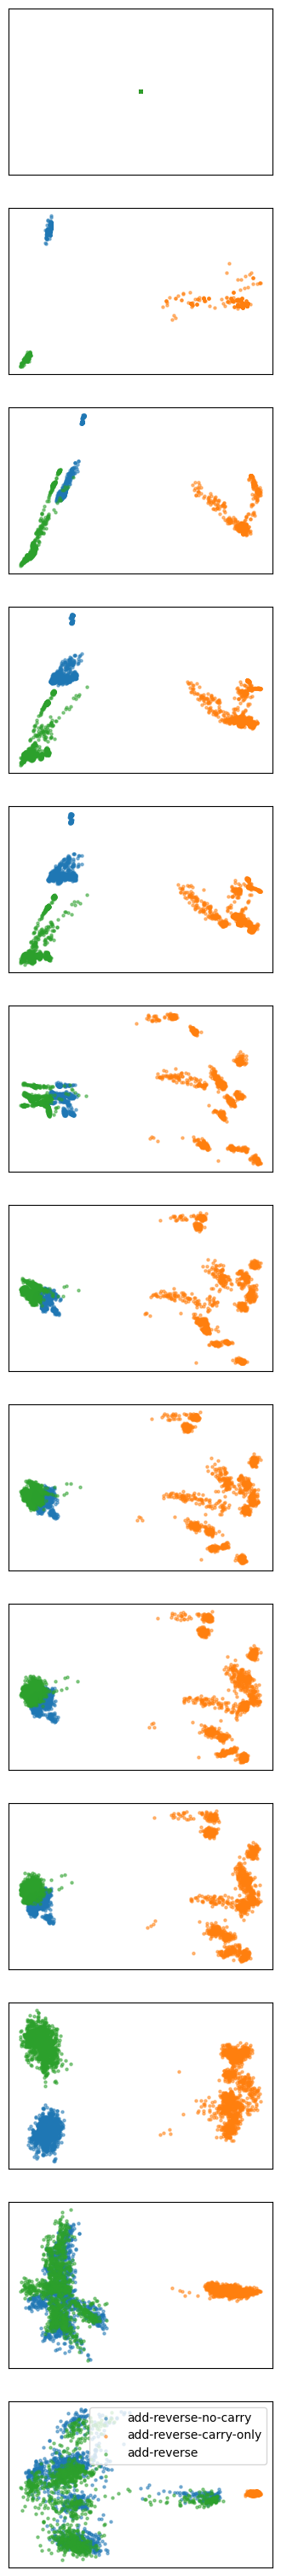

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

N, L, B, D = all_states.shape
print(all_states.shape)

fig, axes = plt.subplots(L, figsize=(4, L * 3))
for layer in range(0, L):
    pca = PCA(n_components=2)
    X = all_states[:, layer].reshape(-1, D)
    y = torch.tensor([[i] * B for i in range(N)]).reshape(-1)
    pca.fit(X)
    for i in range(len(names)):
        X_test = pca.transform(all_states[i, layer].reshape(-1, D))
        axes[layer].scatter(X_test[:, 0], X_test[:, 1], label=names[i], alpha=0.5, s=5)
    axes[layer].set_xticks([])
    axes[layer].set_yticks([])

plt.legend()
plt.show()
